# Recommended Analysis
	1. What attributes are more common among churners than non-churners? Can churn be predicted using the variables in the data?
	2. What do the overall demographics of the bank's customers look like?
	3. Is there a difference between German, French, and Spanish customers in terms of account behavior?
What types of segments exist within the bank's customers?

In [1]:
# Clean Data 
# EDA 
# Answer Question 

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_excel(r"C:\Users\maher\Downloads\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name = "Customer_Info")
df2 = pd.read_excel(r"C:\Users\maher\Downloads\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name = "Account_Info")
df3 = pd.read_excel(r"C:\Users\maher\Downloads\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name = "Bank_Churn_Data_Dictionary ")

In [7]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [9]:
df2.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [11]:
df3

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


In [13]:
Bank_df = pd.merge(df1,df2, on = 'CustomerId')

In [15]:
Bank_df.info()
# Estimated Salary, Balance, and Age should be int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [17]:
Bank_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [19]:
Bank_df.loc[:, 'Balance'] = Bank_df['Balance'].str.replace(r'[\$,€]', '', regex=True)
Bank_df.loc[:, 'Balance'] = pd.to_numeric(
    Bank_df['Balance'], errors='coerce'
).round().astype('Int64')
Bank_df.loc[:, 'Balance'] = Bank_df['Balance'].round().astype('Int64')

Bank_df['Balance'] = pd.to_numeric(Bank_df['Balance'], errors='coerce')
# Convert Balance to a Int data type

In [21]:
Bank_df.loc[:, 'EstimatedSalary'] = Bank_df['EstimatedSalary'].str.replace(r'[\$,€]', '', regex=True)
Bank_df.loc[:, 'EstimatedSalary'] = pd.to_numeric(
    Bank_df['EstimatedSalary'], errors='coerce'
).round().astype('Int64')
Bank_df.loc[:, 'EstimatedSalary'] = Bank_df['EstimatedSalary'].round().astype('Int64')

Bank_df['EstimatedSalary'] = pd.to_numeric(Bank_df['EstimatedSalary'], errors='coerce')
# Convert EstimatedSalary to a Int data type

In [23]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  int64  
 8   Balance          10004 non-null  int64  
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [25]:
Bank_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101349,0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101349,0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112543,83808,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113932,159661,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93827,0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92889,75075,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,38191,130143,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,38191,130143,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,38191,130143,1,No,4,No,0


In [27]:
print(Bank_df['Age'].isna().sum())
# Nulls found

3


In [29]:
Bank_df[Bank_df['Age'].isna()]
# Will dropped for now, EstimatedSalary needs to be clarified with Client as -999999 seems odd. 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999,141349,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999,120193,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999,0,1,Yes,2,Yes,0


In [31]:
Bank_df = Bank_df.dropna(subset=['Age'])
#Dropping null values for Age 

In [33]:
Bank_df['Age'] = Bank_df['Age'].round().astype('Int64')
#Converting Age to Int from Float

C:\Users\maher\AppData\Local\Temp\ipykernel_35844\925236411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_df['Age'] = Bank_df['Age'].round().astype('Int64')


In [35]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10001 non-null  int64 
 1   Surname          10001 non-null  object
 2   CreditScore      10001 non-null  int64 
 3   Geography        10001 non-null  object
 4   Gender           10001 non-null  object
 5   Age              10001 non-null  Int64 
 6   Tenure_x         10001 non-null  int64 
 7   EstimatedSalary  10001 non-null  int64 
 8   Balance          10001 non-null  int64 
 9   NumOfProducts    10001 non-null  int64 
 10  HasCrCard        10001 non-null  object
 11  Tenure_y         10001 non-null  int64 
 12  IsActiveMember   10001 non-null  object
 13  Exited           10001 non-null  int64 
dtypes: Int64(1), int64(8), object(5)
memory usage: 1.2+ MB


In [37]:
Bank_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112543,83808,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42,8,113932,159661,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39,1,93827,0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92889,75075,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0


In [39]:
#Done with cleaning for now, 

# We changed Estimated Salary, Age, and Balance to int values to make them easier to work with. Next I'd like to create Age bins. 

In [41]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10001 non-null  int64 
 1   Surname          10001 non-null  object
 2   CreditScore      10001 non-null  int64 
 3   Geography        10001 non-null  object
 4   Gender           10001 non-null  object
 5   Age              10001 non-null  Int64 
 6   Tenure_x         10001 non-null  int64 
 7   EstimatedSalary  10001 non-null  int64 
 8   Balance          10001 non-null  int64 
 9   NumOfProducts    10001 non-null  int64 
 10  HasCrCard        10001 non-null  object
 11  Tenure_y         10001 non-null  int64 
 12  IsActiveMember   10001 non-null  object
 13  Exited           10001 non-null  int64 
dtypes: Int64(1), int64(8), object(5)
memory usage: 1.2+ MB


In [43]:
# Bin Age, create column 

In [45]:
Dict_df = df3
Dict_df = Dict_df.style.set_properties(**{'text-align': 'left'})
Dict_df


,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's credit score
3,Geography,"The country where the customer resides (France, Spain or Germany)"
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with the bank
7,Balance,The customer's account balance
8,NumOfProducts,"The number of bank products the customer uses (e.g., savings account, credit card)"
9,HasCrCard,"Whether the customer has a credit card (1 = yes, 0 = no)"


In [47]:
Bank_df['Age'].max()

92

In [49]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,80),(81,92)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

Bank_df['Age_Group'] = Bank_df['Age'].apply(assign_age_group)

C:\Users\maher\AppData\Local\Temp\ipykernel_35844\1233773887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_df['Age_Group'] = Bank_df['Age'].apply(assign_age_group)


In [51]:
Bank_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Group
0,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1,41 - 50
1,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1,41 - 50
2,15647311,Hill,608,Spain,Female,41,1,112543,83808,1,Yes,1,Yes,0,41 - 50
3,15619304,Onio,502,French,Female,42,8,113932,159661,3,No,8,No,1,41 - 50
4,15701354,Boni,699,FRA,Female,39,1,93827,0,2,No,1,No,0,31 - 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92889,75075,2,No,3,No,1,41 - 50
10000,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0,23 - 30
10001,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0,23 - 30
10002,15628319,Walker,792,French,Female,28,4,38191,130143,1,No,4,No,0,23 - 30


### 1. What attributes are more common among churners than non-churners? Can churn be predicted using the variables in the data?

<Axes: >

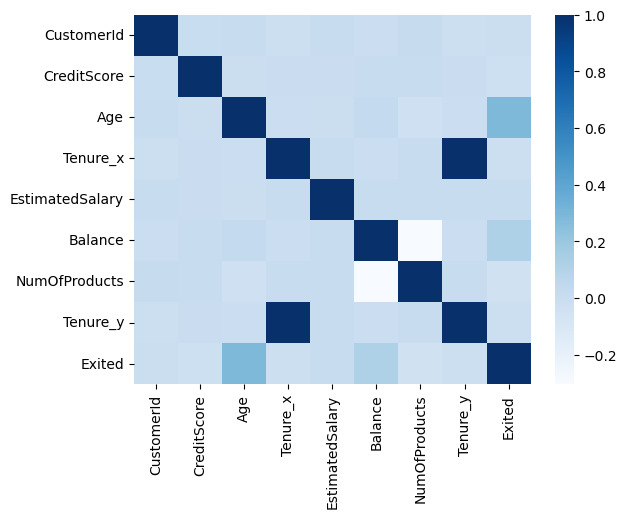

In [96]:
sns.heatmap(Bank_df.corr(numeric_only = True, method = 'pearson'), cmap = 'Blues')

In [56]:
Bank_df.corr(numeric_only = True, method = 'pearson')['Exited'].sort_values(ascending = False)
# Seems to be some positive corr with Age, Blance, and EstimatedSalary

Exited             1.000000
Age                0.285431
Balance            0.118159
EstimatedSalary    0.012243
CustomerId        -0.006275
Tenure_x          -0.014221
Tenure_y          -0.014221
CreditScore       -0.027455
NumOfProducts     -0.047989
Name: Exited, dtype: float64

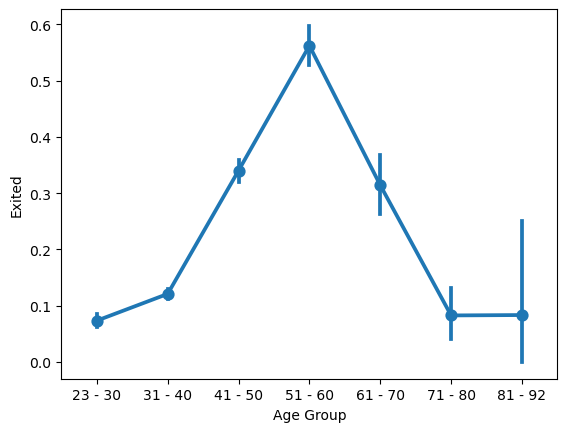

In [338]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 92']
sns.pointplot(data = Bank_df, x = 'Age_Group', y = 'Exited', order = age_order )
plt.xlabel('Age Group')
plt.ylabel('Exited')
plt.show()

In [60]:
counts = Bank_df['Age_Group'].value_counts()
percentage = counts / Bank_df.shape[0]
percent_Exited = percentage.reset_index()
percent_Exited.columns = ['Age_Group', 'percentage']
percent_Exited = percent_Exited.sort_values('Age_Group')
percent_Exited

#Explore why there are unknown values

,Age_Group,percentage
2,23 - 30,0.174483
0,31 - 40,0.444856
1,41 - 50,0.231977
3,51 - 60,0.079692
4,61 - 70,0.033097
6,71 - 80,0.012099
7,81 - 92,0.001200
5,Unknown,0.022598


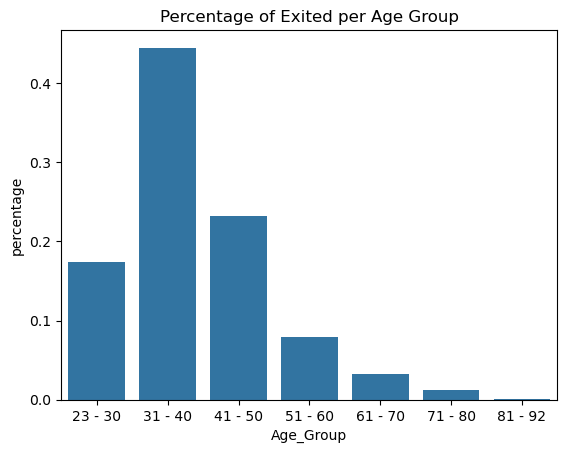

In [64]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 92']
sns.barplot( x = 'Age_Group', y = 'percentage', data = percent_Exited, order = age_order)
plt.title('Percentage of Exited per Age Group')
plt.show()

In [ ]:
# Individuals age 23-50 have a much higher chance of exiting, with a .4 corr with customers 31-40.

In [78]:
Bank_df['Balance'].min()


0

In [80]:
Bank_df['Balance'].max()

250898

<Axes: ylabel='Frequency'>

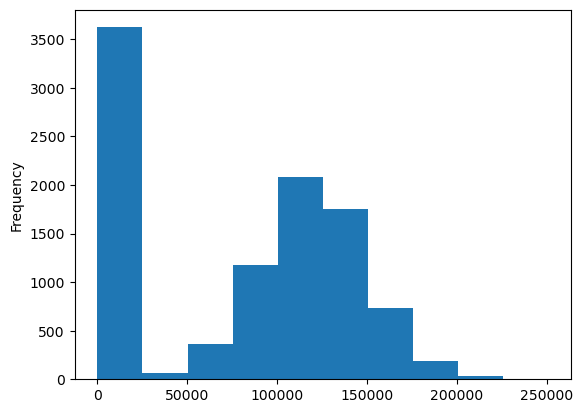

In [82]:
Bank_df['Balance'].plot.hist(bins = 10)

In [98]:
# We need to bin Balance 

In [104]:
Bank_df['Balance'].describe()

count     10001.000000
mean      76491.132687
std       62396.308033
min           0.000000
25%           0.000000
50%       97208.000000
75%      127655.000000
max      250898.000000
Name: Balance, dtype: float64

In [160]:
bins = [-1, 50000, 100000, 150000, 200000, 251000]
labels = ['0 - 50,000', '50,000 - 100,000', '100,000 - 150,000', '150,000 - 200,000', '200,000 - 250,000']
Bank_df['Balance_bin'] = pd.cut(Bank_df['Balance'], bins = bins, labels = labels)
print(Bank_df)

       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure_x  \
0        15634602   Hargrave          619       FRA  Female   42         2   
1        15634602   Hargrave          619       FRA  Female   42         2   
2        15647311       Hill          608     Spain  Female   41         1   
3        15619304       Onio          502    French  Female   42         8   
4        15701354       Boni          699       FRA  Female   39         1   
...           ...        ...          ...       ...     ...  ...       ...   
9999     15682355  Sabbatini          772   Germany    Male   42         3   
10000    15628319     Walker          792    French  Female   28         4   
10001    15628319     Walker          792    French  Female   28         4   
10002    15628319     Walker          792    French  Female   28         4   
10003    15628319     Walker          792    French  Female   28         4   

       EstimatedSalary  Balance  NumOfProducts HasCrCard  Tenur

C:\Users\maher\AppData\Local\Temp\ipykernel_35844\2895710540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_df['Balance_bin'] = pd.cut(Bank_df['Balance'], bins = bins, labels = labels)


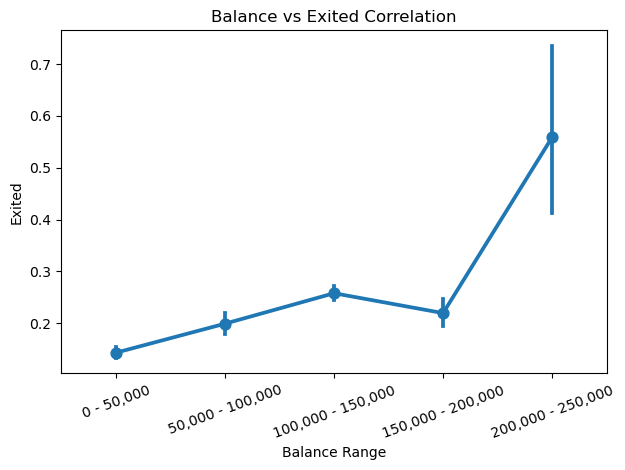

In [204]:
sns.pointplot( x = 'Balance_bin', y = 'Exited', data = Bank_df)
plt.title('Balance vs Exited Correlation')
plt.xlabel('Balance Range')
plt.ylabel('Exited')
plt.xticks(rotation=20)
plt.tight_layout() 
plt.show()

In [ ]:
## Individiuals who have a balance of 200,000 to 250,000 are most likley to churn 

In [266]:
Bank_df['EstimatedSalary'].describe()

count     10001.000000
mean     100073.776322
std       57517.262304
min          12.000000
25%       50911.000000
50%      100200.000000
75%      149384.000000
max      199992.000000
Name: EstimatedSalary, dtype: float64

In [258]:
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0 - 50,000', '50,000 - 100,000', '100,000 - 150,000', '150,000 - 200,000']
Bank_df['EstSalary_bin'] = pd.cut(Bank_df['EstimatedSalary'], bins = bins, labels = labels)
print(Bank_df)

       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure_x  \
0        15634602   Hargrave          619    France  Female   42         2   
1        15634602   Hargrave          619    France  Female   42         2   
2        15647311       Hill          608     Spain  Female   41         1   
3        15619304       Onio          502    France  Female   42         8   
4        15701354       Boni          699    France  Female   39         1   
...           ...        ...          ...       ...     ...  ...       ...   
9999     15682355  Sabbatini          772   Germany    Male   42         3   
10000    15628319     Walker          792    France  Female   28         4   
10001    15628319     Walker          792    France  Female   28         4   
10002    15628319     Walker          792    France  Female   28         4   
10003    15628319     Walker          792    France  Female   28         4   

       EstimatedSalary  Balance  NumOfProducts HasCrCard  Tenur

C:\Users\maher\AppData\Local\Temp\ipykernel_35844\2368617569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_df['EstSalary_bin'] = pd.cut(Bank_df['EstimatedSalary'], bins = bins, labels = labels)


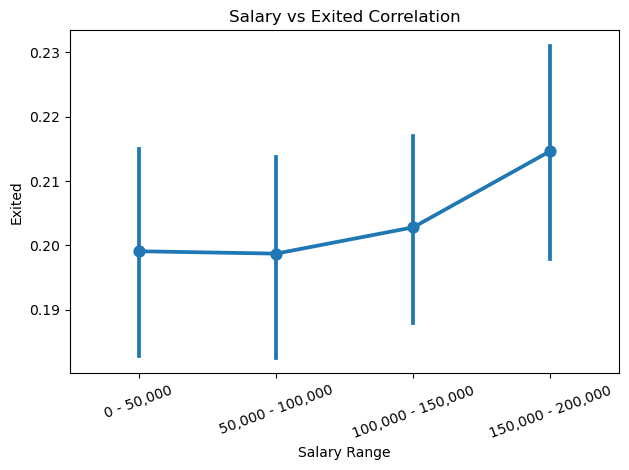

In [262]:
sns.pointplot( x = 'EstSalary_bin', y = 'Exited', data = Bank_df)
plt.title('Salary vs Exited Correlation')
plt.xlabel('Salary Range')
plt.ylabel('Exited')
plt.xticks(rotation=20)
plt.tight_layout() 
plt.show()

In [ ]:
# A very small corr can be seen as salary increase exit rates increase as well 

### 2. What do the overall demographics of the bank's customers look like?


In [206]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerId           10001 non-null  int64   
 1   Surname              10001 non-null  object  
 2   CreditScore          10001 non-null  int64   
 3   Geography            10001 non-null  object  
 4   Gender               10001 non-null  object  
 5   Age                  10001 non-null  Int64   
 6   Tenure_x             10001 non-null  int64   
 7   EstimatedSalary      10001 non-null  int64   
 8   Balance              10001 non-null  int64   
 9   NumOfProducts        10001 non-null  int64   
 10  HasCrCard            10001 non-null  object  
 11  Tenure_y             10001 non-null  int64   
 12  IsActiveMember       10001 non-null  object  
 13  Exited               10001 non-null  int64   
 14  Age_Group            10001 non-null  object  
 15  Balance_bin          100

In [212]:
print(Bank_df[['Age', 'Balance', 'EstimatedSalary']]).describe()

       Age  Balance  EstimatedSalary
0       42        0           101349
1       42        0           101349
2       41    83808           112543
3       42   159661           113932
4       39        0            93827
...    ...      ...              ...
9999    42    75075            92889
10000   28   130143            38191
10001   28   130143            38191
10002   28   130143            38191
10003   28   130143            38191

[10001 rows x 3 columns]


AttributeError: 'NoneType' object has no attribute 'describe'

In [218]:
print(Bank_df['Gender'].value_counts(normalize=True))

Gender
Male      0.545545
Female    0.454455
Name: proportion, dtype: float64


In [220]:
print(Bank_df['Geography'].value_counts(normalize=True))
#We need to clean the Geography Column
# Combinging Franch and FRA into France

Geography
Germany    0.250775
Spain      0.247575
France     0.173983
French     0.165783
FRA        0.161884
Name: proportion, dtype: float64


In [230]:
Bank_df[Bank_df['Geography'] == 'FRA']

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Group,Balance_bin,Balance_bin_encoded
0,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1,41 - 50,"0 - 50,000",0
1,15634602,Hargrave,619,FRA,Female,42,2,101349,0,1,Yes,2,Yes,1,41 - 50,"0 - 50,000",0
4,15701354,Boni,699,FRA,Female,39,1,93827,0,2,No,1,No,0,31 - 40,"0 - 50,000",0
13,15632264,Kay,476,FRA,Female,34,10,26261,0,2,No,10,No,0,31 - 40,"0 - 50,000",0
25,15625047,Yen,846,FRA,Female,38,5,187616,0,1,Yes,5,Yes,0,31 - 40,"0 - 50,000",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,15695474,Barker,583,FRA,Male,33,7,13549,122532,1,No,7,No,0,31 - 40,"100,000 - 150,000",2
9978,15579969,Mancini,683,FRA,Female,32,9,24992,0,2,Yes,9,Yes,0,31 - 40,"0 - 50,000",0
9984,15656710,Cocci,613,FRA,Male,40,4,151325,0,1,No,4,No,0,31 - 40,"0 - 50,000",0
9994,15569266,Rahman,644,FRA,Male,28,7,29180,155060,1,No,7,No,0,23 - 30,"150,000 - 200,000",3


In [232]:
Bank_df.loc[Bank_df['Geography'].isin(['FRA', 'French']), 'Geography'] = 'France'

In [234]:
print(Bank_df['Geography'].value_counts(normalize=True))

Geography
France     0.501650
Germany    0.250775
Spain      0.247575
Name: proportion, dtype: float64


In [224]:
print(Bank_df['Geography'].isna().sum())

0


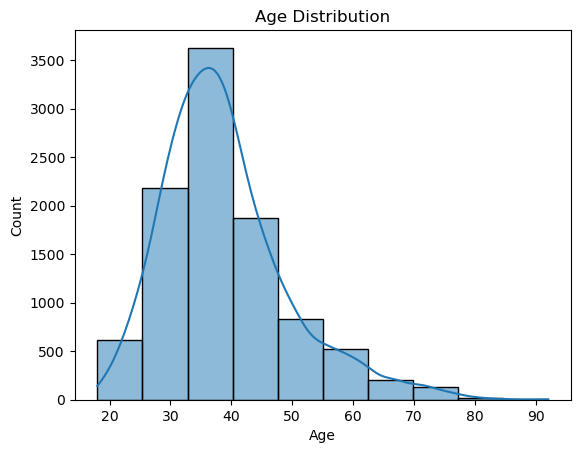

In [238]:
sns.histplot(Bank_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

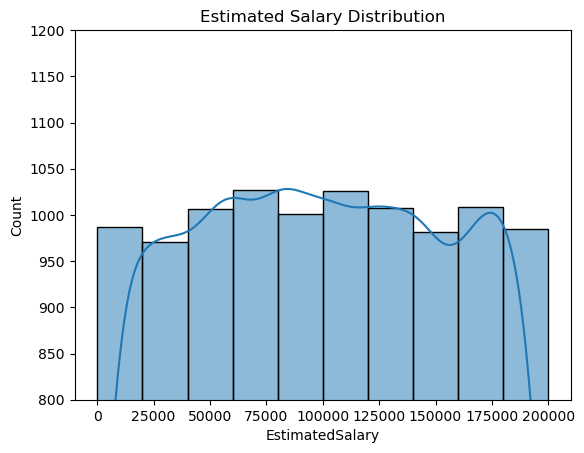

In [280]:
sns.histplot(Bank_df['EstimatedSalary'], bins=10, kde=True)
plt.title('Estimated Salary Distribution')
plt.ylim(800,1200)
plt.show()

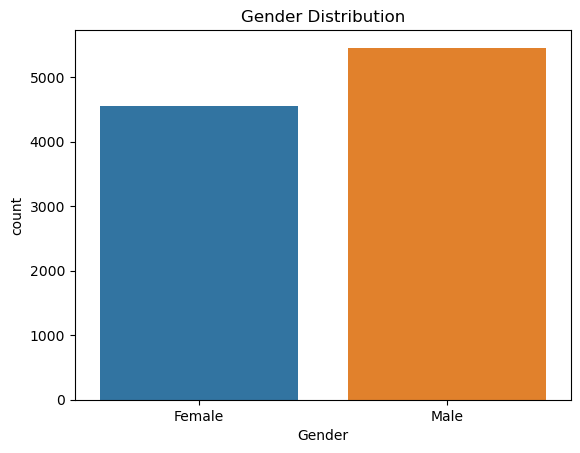

In [274]:
sns.countplot(x='Gender', data=Bank_df, hue = 'Gender')
plt.title('Gender Distribution')
plt.show()

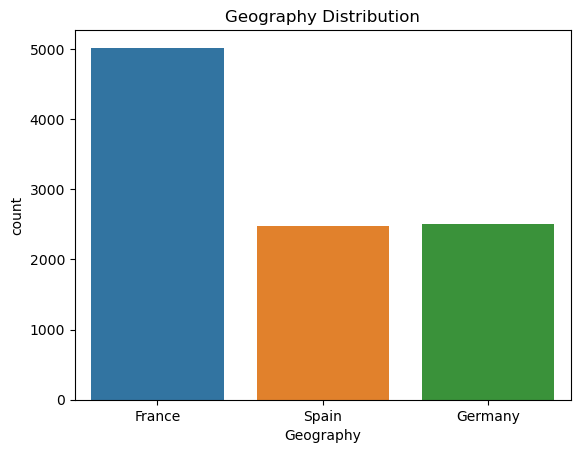

In [272]:
sns.countplot(x='Geography', data= Bank_df, hue = 'Geography')
plt.title('Geography Distribution')
plt.show()

### 3. Is there a difference between German, French, and Spanish customers in terms of account behavior?¶


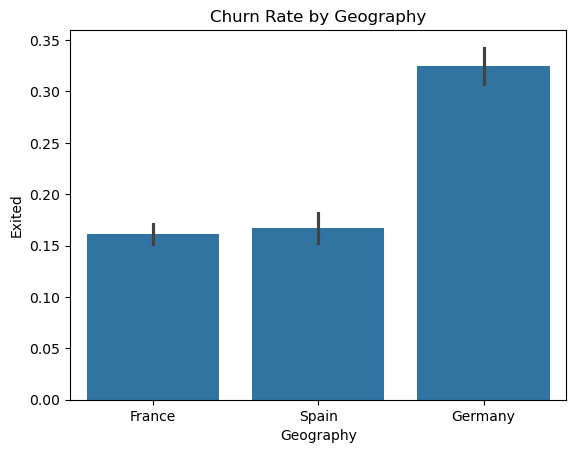

In [287]:
sns.barplot(x='Geography', y='Exited', data=Bank_df)
plt.title('Churn Rate by Geography')
plt.show()


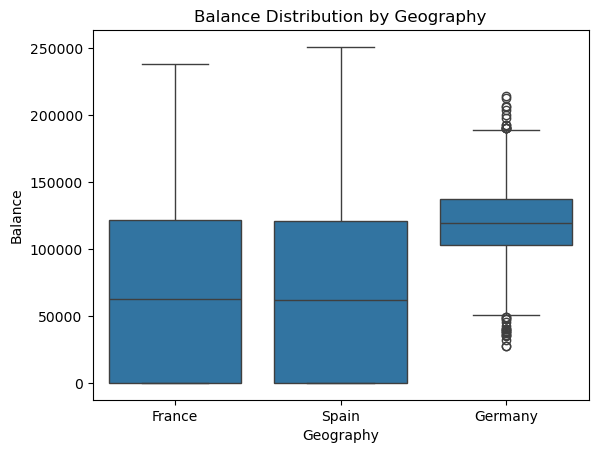

In [289]:
sns.boxplot(x='Geography', y='Balance', data=Bank_df)
plt.title('Balance Distribution by Geography')
plt.show()
# Germans have a much higher rate to Exit

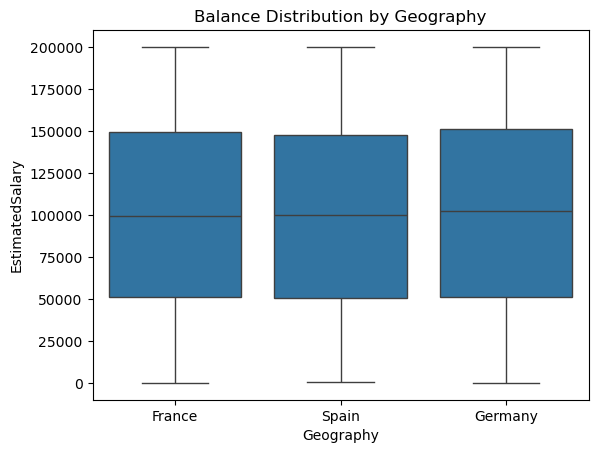

In [293]:
sns.boxplot(x='Geography', y='EstimatedSalary', data=Bank_df)
plt.title('Balance Distribution by Geography')
plt.show()
#Germans seem to have a higher balance, min, max, and avg when compared to France and Spain.

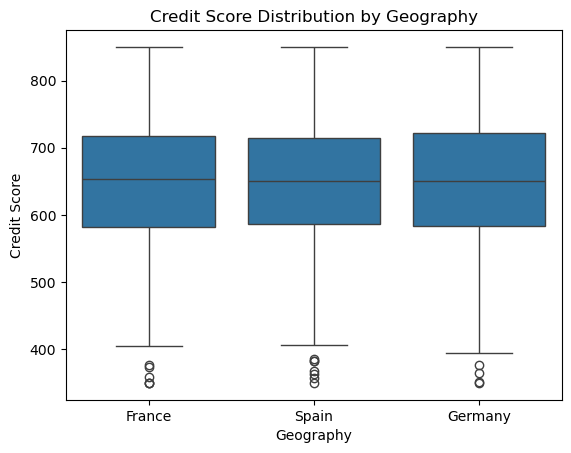

In [295]:
sns.boxplot(x='Geography', y='CreditScore', data=Bank_df)
plt.title('Credit Score Distribution by Geography')
plt.ylabel('Credit Score')
plt.show()

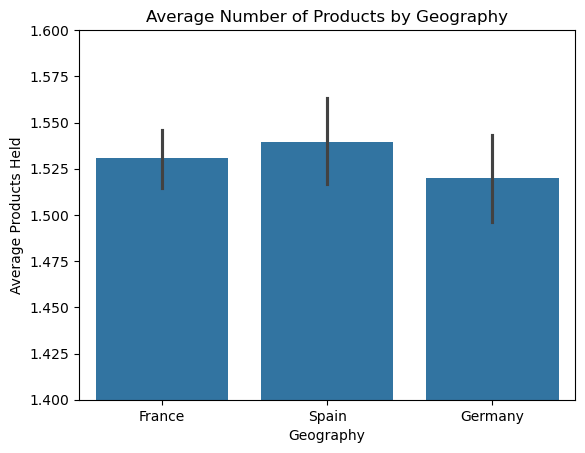

In [299]:
sns.barplot(x='Geography', y='NumOfProducts', data=Bank_df)
plt.title('Average Number of Products by Geography')
plt.ylabel('Average Products Held')
plt.ylim(1.4,1.6)
plt.show()
#Negligble 

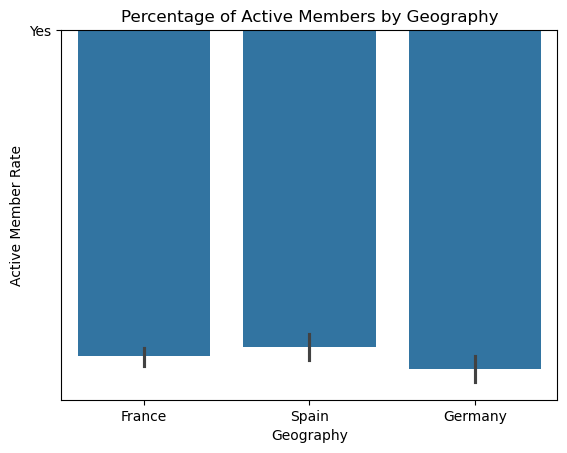

In [301]:
sns.barplot(x='Geography', y='IsActiveMember', data=Bank_df)
plt.title('Percentage of Active Members by Geography')
plt.ylabel('Active Member Rate')
plt.show()

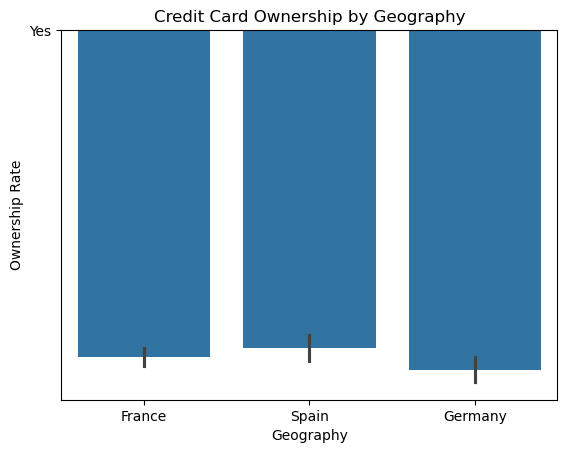

In [303]:
sns.barplot(x='Geography', y='HasCrCard', data=Bank_df)
plt.title('Credit Card Ownership by Geography')
plt.ylabel('Ownership Rate')
plt.show()

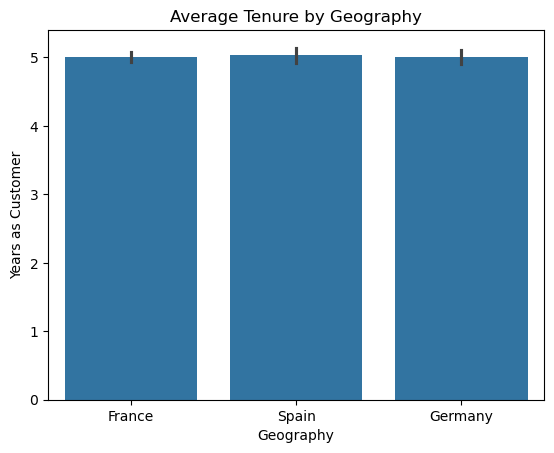

In [307]:
sns.barplot(x='Geography', y='Tenure_x', data=Bank_df)
plt.title('Average Tenure by Geography')
plt.ylabel('Years as Customer')
plt.show()

### 4. What types of segments exist within the bank's customers?

In [309]:
Bank_df.groupby(['Geography', 'IsActiveMember', 'NumOfProducts'])['Exited'].mean()

Geography  IsActiveMember  NumOfProducts
France     No              1                0.295382
                           2                0.070128
                           3                0.866667
                           4                1.000000
           Yes             1                0.153846
                           2                0.045705
                           3                0.681818
                           4                1.000000
Germany    No              1                0.520833
                           2                0.165254
                           3                0.927273
                           4                1.000000
           Yes             1                0.323248
                           2                0.084507
                           3                0.853659
                           4                1.000000
Spain      No              1                0.325411
                           2                0.099303
     

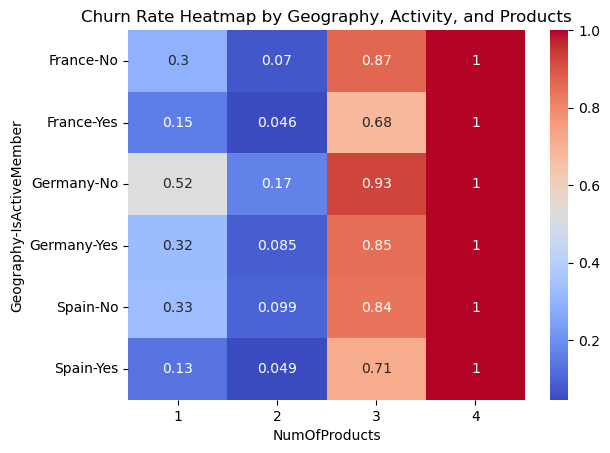

In [328]:
grouped_data = Bank_df.groupby(['Geography', 'IsActiveMember', 'NumOfProducts'])['Exited'].mean().reset_index()

pivot = grouped_data.pivot_table(
    index=['Geography', 'IsActiveMember'],
    columns='NumOfProducts',
    values='Exited'
)

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Churn Rate Heatmap by Geography, Activity, and Products')
plt.show()

#Germans who are not active members that have 3 products are the most likley to exit with a corr of .93,
#Follow by French customers who are not active with 3 products with a corr of .87
#Customers with 3 products listed have a very likley chance of exiting at some point. 
#Furhter analysis in NumOfProducts corr is needed. 

In [348]:
Bank_df.corr(numeric_only=True)


,CustomerId,CreditScore,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,Tenure_y,Exited,Balance_bin_encoded
CustomerId,1.000000,0.005136,0.009786,-0.014525,0.015580,-0.012381,0.017272,-0.014525,-0.006275,-0.014671
CreditScore,0.005136,1.000000,-0.004476,0.000537,-0.001897,0.006607,0.011708,0.000537,-0.027455,0.006111
Age,0.009786,-0.004476,1.000000,-0.009959,-0.006885,0.027877,-0.030441,-0.009959,0.285431,0.024270
Tenure_x,-0.014525,0.000537,-0.009959,1.000000,0.007857,-0.012296,0.013507,1.000000,-0.014221,-0.010249
EstimatedSalary,0.015580,-0.001897,-0.006885,0.007857,1.000000,0.012472,0.014462,0.007857,0.012243,0.011301
Balance,-0.012381,0.006607,0.027877,-0.012296,0.012472,1.000000,-0.304234,-0.012296,0.118159,0.972205
NumOfProducts,0.017272,0.011708,-0.030441,0.013507,0.014462,-0.304234,1.000000,0.013507,-0.047989,-0.284153
Tenure_y,-0.014525,0.000537,-0.009959,1.000000,0.007857,-0.012296,0.013507,1.000000,-0.014221,-0.010249
Exited,-0.006275,-0.027455,0.285431,-0.014221,0.012243,0.118159,-0.047989,-0.014221,1.000000,0.116940
Balance_bin_encoded,-0.014671,0.006111,0.024270,-0.010249,0.011301,0.972205,-0.284153,-0.010249,0.116940,1.000000


In [352]:
Bank_df.corr(numeric_only = True, method = 'pearson')['NumOfProducts'].sort_values(ascending = False)
# This concludes the exploration of Num of products 

NumOfProducts          1.000000
CustomerId             0.017272
EstimatedSalary        0.014462
Tenure_x               0.013507
Tenure_y               0.013507
CreditScore            0.011708
Age                   -0.030441
Exited                -0.047989
Balance_bin_encoded   -0.284153
Balance               -0.304234
Name: NumOfProducts, dtype: float64

<Axes: >

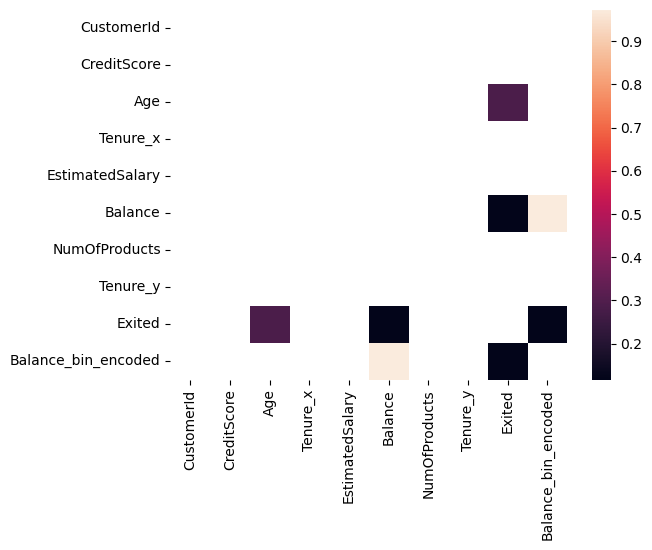

In [322]:
Bank_corr = Bank_df.corr(numeric_only = True, method = 'pearson')
Bank_corr = Bank_corr[((Bank_corr > 0.1) & (Bank_corr < 1))]
sns.heatmap(Bank_corr)

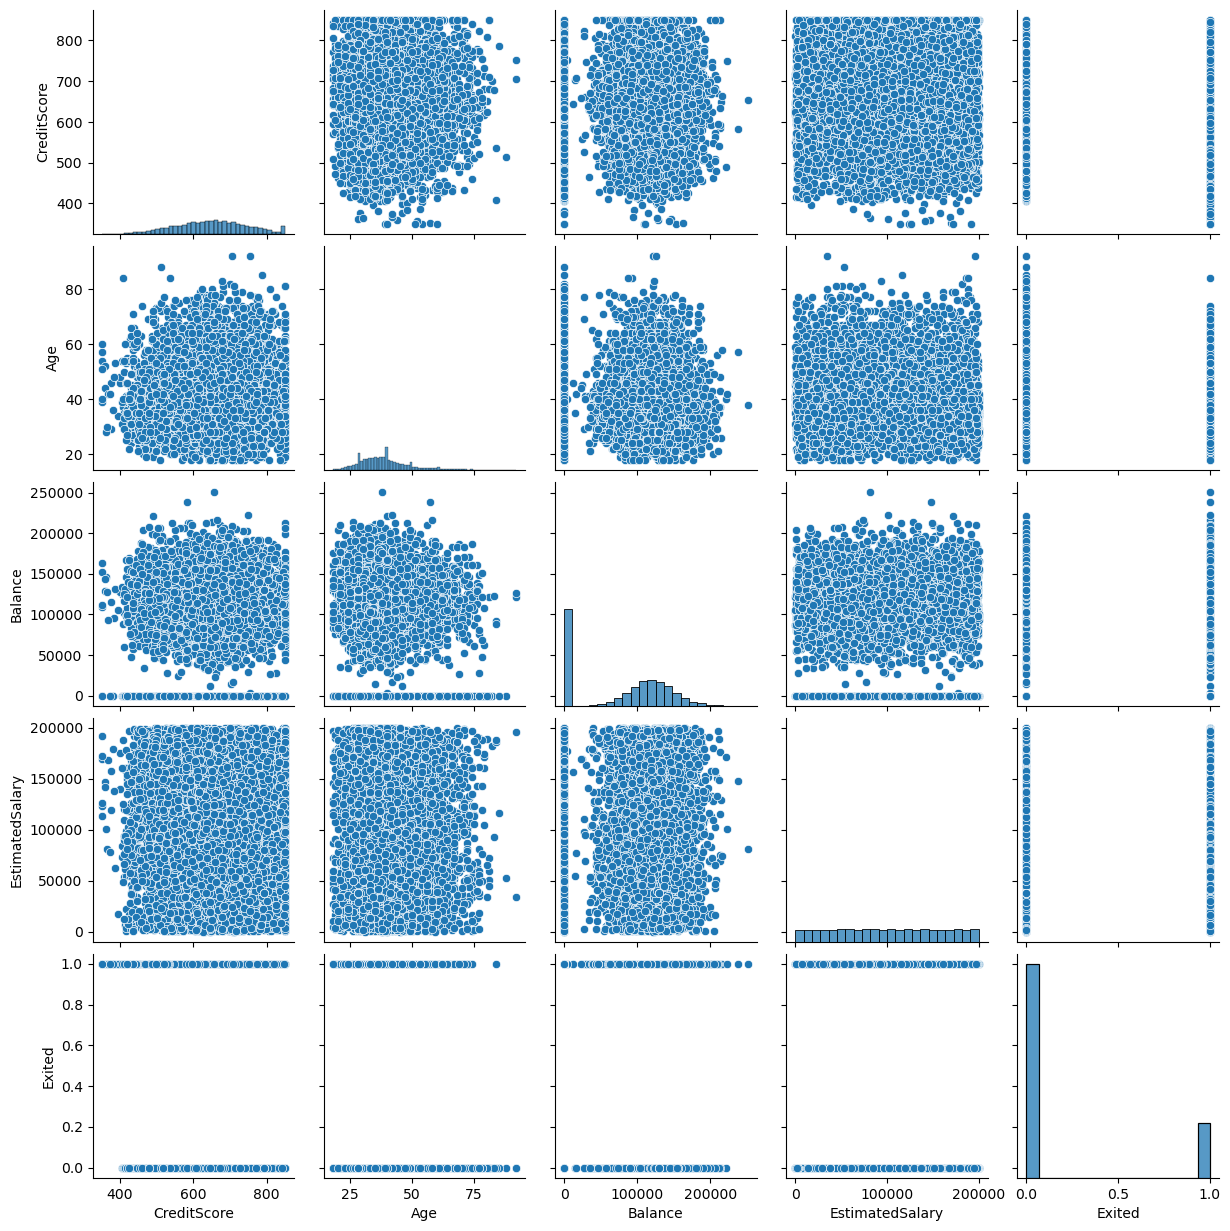

In [324]:
sns.pairplot(Bank_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']])
plt.show()

In [332]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerId           10001 non-null  int64   
 1   Surname              10001 non-null  object  
 2   CreditScore          10001 non-null  int64   
 3   Geography            10001 non-null  object  
 4   Gender               10001 non-null  object  
 5   Age                  10001 non-null  Int64   
 6   Tenure_x             10001 non-null  int64   
 7   EstimatedSalary      10001 non-null  int64   
 8   Balance              10001 non-null  int64   
 9   NumOfProducts        10001 non-null  int64   
 10  HasCrCard            10001 non-null  object  
 11  Tenure_y             10001 non-null  int64   
 12  IsActiveMember       10001 non-null  object  
 13  Exited               10001 non-null  int64   
 14  Age_Group            10001 non-null  object  
 15  Balance_bin          100